In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




---

**Scenario**: A salesman has scheduled two appointments to sell software, one in the morning and another one in the afternoon. There are two software
editions available: the base edition costing Rs. 5000 and the premium edition costing Rs. 10000. His morning appointments typically lead
to a sale with a 30% chance while the afternoon ones typically lead to a sale with a 60% chance independent of what happened in the
morning. If the morning appointment ends up in sale, the salesman has a 70% chance of selling the premium edition and if the afternoon
appointment ends up in a sale, he is equally likely to sell either of the editions. Let X be the random variable representing the total Rupee
value of sales. What are the different values that X can take? Calculate the probability that X takes the value 5000?

---

In [2]:
# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_morning = 0.3 # Success probability of sales in morning
p_afternoon =  0.6# Success probability of sales in afternoon
p_appointment = matrix(nrow = 2, ncol = 2, c(1-p_morning, p_morning, 1-p_afternoon, p_afternoon), byrow = TRUE)

# Sampling space for software type
s_software = c(5000, 10000)

# Software type probabilities
p_software = matrix(nrow = 2, ncol = 2, c(0.3, 0.7, 0.5, 0.5), byrow = TRUE)

# Function that simulates one trial of the random experiment which is
# what the salesman earns on a random day
salesResult = function(){
  result = numeric(2)
  # Simulate whether sales happen in morning and afternoon appointments
  for (j in c(1:2)){
    result[j] = sample(s_appointment, size = 1, replace = TRUE, prob = p_appointment[j, ])
  }
  earnings = ifelse(result[1] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[1, ]), 0) + ifelse(result[2] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[2, ]), 0)
  return(earnings)
}

# Number of simulations
nsimulations = 1e5
simulatedData = replicate(nsimulations, salesResult())

# Probability that the salesman earns Rs 5000
mean(simulatedData == 5000)


# Can we calculate all the probabilities in one shot?
table(simulatedData) / nsimulations


[1] 0.2482

simulatedData
      0    5000   10000   15000   20000 
0.27811 0.24820 0.32140 0.08910 0.06319 

---

**Discrete random variable**: Let ${\color{red}X}$  represent the total earnings from one day which is random; that is, ${\color{red}X}$ is a discrete random variable which can take the values $0, 5000, 10000, 15000, 20000.$ The associated probabilities can be calculated as:

$\begin{align*}P({\color{red}X} = 0)  &= 0.7\times0.4 = 0.28,\\ P({\color{red}X} = 5000) &= 0.3\times0.3\times0.4+0.7\times0.6\times0.5=0.246,\\ P({\color{red}X} = 10000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.4+0.7\times0.6\times0.5=0.321,\\ P({\color{red}X} = 15000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.6\times0.5=0.09,\\ P({\color{red}X} = 20000) &= 0.3\times0.7\times0.4+0.3\times0.6\times0.5 = 0.063.\end{align*}$

---

**Probability Mass Function (PMF)** of the random variable ${\color{red}X}$ is denoted as ${\color{red}{P_X}}(x),$ where $x$ represents the possible values that the random variable ${\color{red}X}$ can take:

$\begin{align*}{\color{red}{P_X}}(0) &= P({\color{red}X} = 0)  = 0.28,\\ {\color{red}{P_X}}(5000) &=P({\color{red}X} = 5000) = 0.246,\\ {\color{red}{P_X}}(10000) &=P({\color{red}X} = 10000) = 0.321,\\ {\color{red}{P_X}}(15000) &=P({\color{red}X} = 15000) = 0.09,\\ {\color{red}{P_X}}(20000) &=P({\color{red}X} = 20000) = 0.063.\end{align*}$

---

---

Plot the frequency of occurences of all possible values of the random variable $\color{red}X$

---

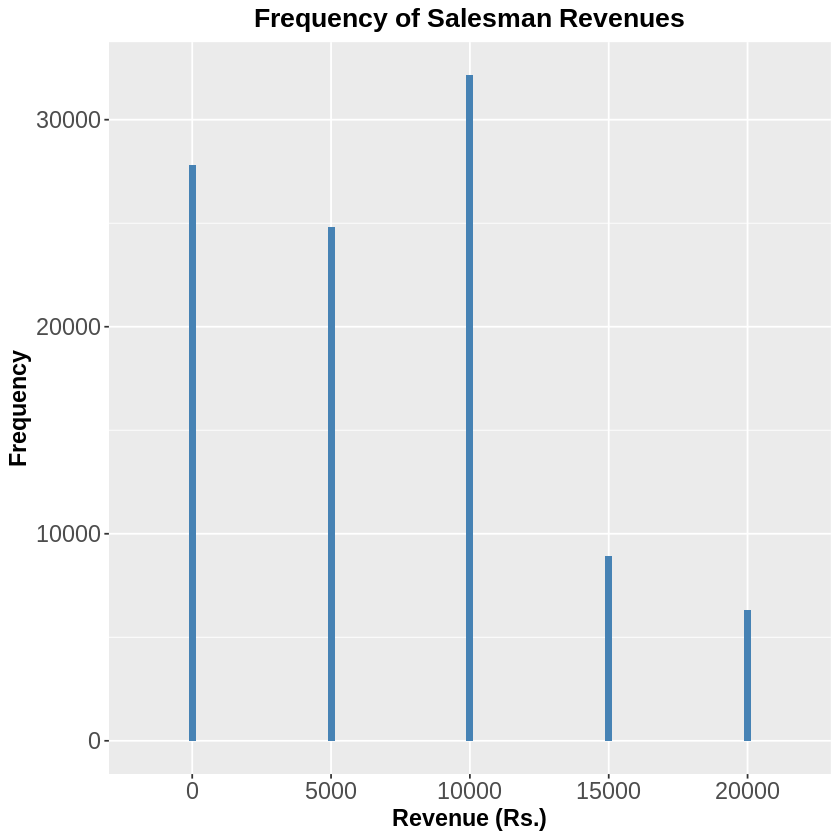

In [3]:
# Convert simulatedData into a dataframe
dfSales = as.data.frame(simulatedData)

# Add names to the columns
colnames(dfSales) = c('Earning')

p = ggplot(data = dfSales)+
geom_bar(aes(x = factor(Earning)), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue (Rs.)',
       y = 'Frequency',
       title = 'Frequency of Salesman Revenues')
p

---

Plot the PMF of the random variable $\color{red}X$

---

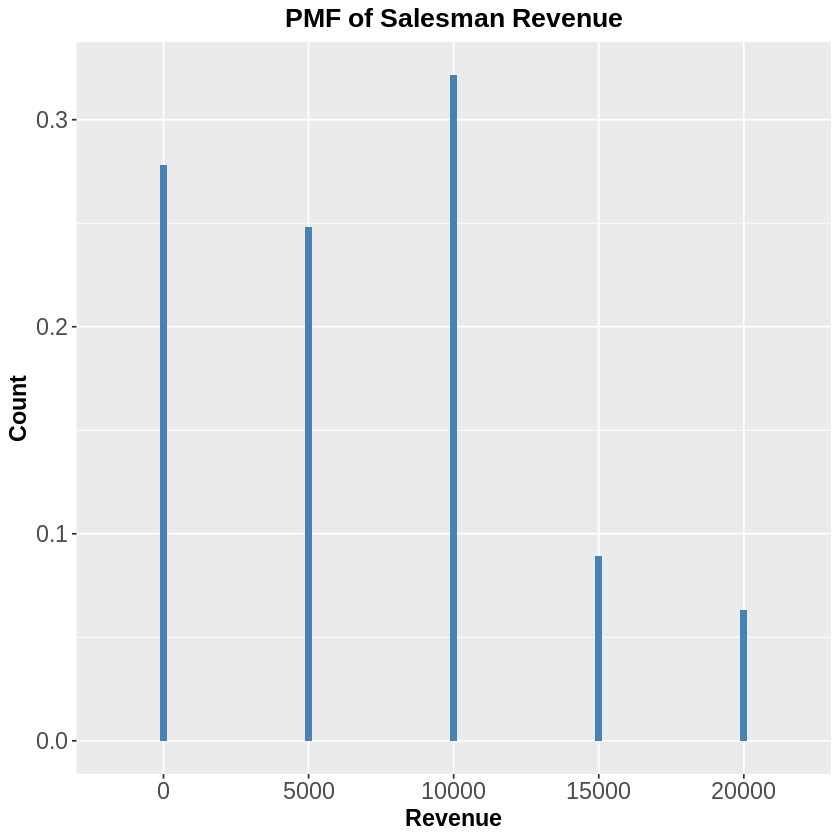

In [4]:
# Convert table of simulatedData into a dataframe
dfSales = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfSales) = c('Earning', 'Frequency')

# Add a new column with proportion (probability) values
dfSales['Probability'] = dfSales['Frequency'] / nsimulations

#head(dfSales, 5)

p = ggplot(data = dfSales)+
geom_col(aes(x = Earning, y = Probability), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue',
       y = 'Count',
       title = 'PMF of Salesman Revenue')
p


What is the salesman's expected earnings? What does it even mean to say "expected earning?" It is a single number denoted as $E[X]$ and referred to as the *expected value of* $X$ which can be calculated as follows:


---



*   *From a simulation perspective*, it is simply an average of all the simulated earnings:
$\begin{align*}E[X] &\approx \frac{1}{\text{nsimulations}}\times\begin{cases}\text{No. of times 0 appeared}\times0\\\qquad\qquad\quad+\\\text{No. of times 5000 appeared}\times 5000\\\qquad\qquad\quad+\\\text{No. of times 10000 appeared}\times10000\\\qquad\qquad\quad+\\\text{No. of times 15000 appeared}\times15000\\\qquad\qquad\quad+\\\text{No. of times 20000 appeared}\times20000\end{cases}\\&=0\times\underbrace{\frac{\text{No. of times 0 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=0)=P_X(0)}}\\&+5000 \times\underbrace{\frac{\text{No. of times 5000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=5000) = P_X(5000)}}\\&+10000 \times\underbrace{\frac{\text{No. of times 10000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=10000) = P_X(10000)}}\\&+15000 \times\underbrace{\frac{\text{No. of times 15000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=15000)=P_X(15000)}}\\&+20000 \times\underbrace{\frac{\text{No. of times 20000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=20000)=P_X(20000)}}.\end{align*}$


---


*   *From a theoretical perspective*, the expected value of $X$ is defined as the weighted sum of the possible values $X$ can take with the corresponding probabilities as the weights:

$\begin{align*} E[X] &= \sum_xxP_X(x),\ \text{where }x = 0, 5000, 10000, 15000, 20000\\\Rightarrow E[X] &= 0\times P_X(0)+5000\times P_X(5000)+10000\times P_X(10000)+15000\times P_X(15000)+20000\times P_X(20000)\\&=0\times0.28+5000\times0.246+10000\times0.321+15000\times0.09+20000\times0.063 = \text{Rs. }7050.\end{align*}$



---

So, we see that the expected value of $X$ is approximately the long-term average of the simulated (or realized) values of $X.$


In [5]:
# Expected earnings using simulated values
mean(simulatedData) # long term average of the realizations of X

# Expected earnings using the theoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
sum(x * p)

[1] 7055.3

[1] 7050

How much could the salesman's earnings vary from the expected value of the earning calculated in the previous cell?


---


To answer this question, let's first look at the quantity $X-E[X] = X-7050.$ Note that:


*   this is also a random variable with the possible values $0-7050, 5000-7050, 10000-7050, 15000-7050, 20000-7050$;
*   it can be thought of as the random variable that captures the deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&\color{red}{X}-\color{cyan}{E[X]} = \color{red}{X}-\color{cyan}{7050}&\color{magenta}{\text{Probability}}\\
\hline
0 & -7050& 0.28\\
5000 & -2050 & 0.246\\
10000 & 2950 & 0.321\\
15000 & 7950 & 0.09\\
20000 0& 12950 & 0.063
\end{array}
---
Now, consider the quantity $(X-E[X])^2 = (X-7050)^2.$ Note that:


*   this is also a random variable with the possible values $(0-7050)^2, (5000-7050)^2, (10000-7050)^2, (15000-7050)^2, (20000-7050)^2$;
*   it can be thought of as the random variable that captures the squared deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&(\color{red}{X}-\color{cyan}{E[X]})^2 = (\color{red}{X}-\color{cyan}{7050})^2&\color{magenta}{\text{Probability}}\\
\hline
0 & (-7050)^2 & 0.28\\
5000 & (-2050)^2 & 0.246\\
10000 & (2950)^2 & 0.321\\
15000 & (7950)^2& 0.09\\
20000 & (12950)^2 & 0.063
\end{array}

---

$\color{green}{Variance}$ of the random variable $X,$ denoted as $\text{var}[X],$ is the expected squared deviation of $X$ from its expected value. In simple terms, variance of $X$ is the expected value of the random variable $(X-E[X])^2.$

$\begin{align*}\text{Var}[X] &= E\left[\underbrace{(X-E[X])^2}_{\text{squared deviation random variable}}\right]\\&=
\sum_x (x-E[X])^2\times P_X(x)\\& = (0-7050)^2\times P_X(0)+(5000-7050)^2\times P_X(5000)+(10000-7050)^2\times P_X(10000)+(15000-7050)^2\times P_X(15000)+(20000-7050)^2\times P_X(20000)\\&=(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063\\&=309375\ \text{Rupees squared}.\end{align*}$

---

$\color{green}{Standard\ deviation}$ of the random variable $X,$ denoted as $\text{SD}[X],$ is defined as the square root of its variance:

$\begin{align*}\text{SD}[X] &= \sqrt{\text{Var}[X]} = \sqrt{E\left[(X-E[X])^2\right]}\\&=\sqrt{(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063}\\&\approx \text{Rs. 5830.7}.\end{align*}$

---

In [6]:
# Simulated earnings of the salesman
simulatedData

[1]  5000  5000     0 10000 10000  5000 15000  5000 10000  5000 10000     0
    [13]     0 10000 20000  5000 10000 20000 20000 10000 15000     0 10000     0
    [25]     0 20000     0     0  5000  5000  5000  5000 10000 20000  5000  5000
    [37] 15000     0  5000  5000 10000 10000     0 10000  5000     0 10000     0
    [49] 20000 20000 20000  5000 10000 15000  5000     0  5000     0     0     0
    [61] 10000  5000 10000 15000 10000     0     0 10000 10000  5000     0 10000
    [73]     0     0  5000     0     0 10000     0 15000  5000  5000 10000 10000
    [85] 10000 15000  5000     0 15000 20000 15000 10000  5000 10000 10000  5000
    [97] 10000 10000  5000 10000     0 10000     0 15000  5000  5000 10000  5000
   [109] 10000  5000 10000     0 20000     0     0 20000 15000     0     0 10000
   [121] 10000  5000     0     0  5000     0 10000 10000 20000     0 10000     0
   [133] 10000  5000 10000     0  5000     0 10000     0     0 10000 20000     0
   [145] 15000  5000 10000 10000 10000     0 15000 10000     0  5000 15000 10000
   [157]     0 10000 15000  5000     0  5000 10000 10000     0 20000  5000  5000
   [169]     0 10000  5000  5000     0 10000 10000  5000     0     0  5000     0
   [181] 10000  5000     0 10000  5000  5000     0  5000 10000     0 10000  5000
   [193]  5000  5000 10000 15000     0 10000 10000  5000  5000     0     0     0
   [205]     0     0     0 20000     0 10000 10000 10000 20000  5000 10000  5000
   [217] 10000 10000  5000     0  5000     0 10000 10000 20000  5000     0 10000
   [229] 10000 10000 10000     0 15000     0 10000     0 20000     0     0 15000
   [241]  5000 10000  5000  5000  5000 15000  5000 20000 20000 15000  5000     0
   [253] 10000 10000 10000 20000     0 10000 20000     0 20000     0 10000 10000
   [265] 10000 10000 10000 10000  5000 10000  5000 10000  5000     0 10000     0
   [277]     0     0     0 15000     0 10000     0 15000 10000     0 10000     0
   [289] 10000 10000  5000     0     0     0     0     0     0  5000 10000     0
   [301] 10000 10000 15000     0     0 10000  5000     0  5000  5000 10000  5000
   [313]     0     0 20000  5000  5000 10000     0 10000     0     0 10000  5000
   [325] 10000     0  5000     0     0 10000     0  5000 10000 10000 10000  5000
   [337]     0 10000 10000 15000  5000 10000  5000 15000     0     0     0 20000
   [349] 10000  5000 10000  5000  5000  5000  5000 10000 10000     0  5000 10000
   [361]     0  5000     0 15000     0 10000 15000 10000 20000  5000     0 10000
   [373] 10000     0 10000 10000 20000 15000 15000     0 10000 10000 10000     0
   [385] 10000 20000     0     0  5000     0     0 10000 10000 15000 10000 10000
   [397] 15000     0  5000     0  5000     0  5000     0  5000 10000     0     0
   [409] 10000 10000     0 10000 10000 10000  5000 15000     0     0 15000 10000
   [421]  5000  5000     0 10000 10000 10000  5000  5000     0 10000     0 15000
   [433] 10000  5000 10000     0 10000  5000 10000  5000 10000  5000  5000 10000
   [445]  5000  5000 15000 20000 10000  5000 10000     0 20000 10000     0     0
   [457]     0  5000     0 10000 10000 15000     0 15000 15000 10000     0 15000
   [469]     0     0  5000     0  5000 10000 10000 10000 20000 10000 15000 15000
   [481] 10000     0 15000  5000     0  5000 10000  5000  5000  5000     0     0
   [493]     0  5000 10000 10000 10000 15000     0 10000 10000     0     0 10000
   [505]     0     0  5000 20000 20000     0 20000  5000 10000 10000 10000 10000
   [517]     0  5000  5000 10000 10000 10000     0     0 10000  5000 10000     0
   [529] 10000  5000 10000 20000  5000  5000     0 15000 10000 10000 15000  5000
   [541] 10000     0     0  5000     0  5000 10000 20000 20000 10000     0     0
   [553] 10000     0 10000  5000     0     0 10000  5000  5000 10000     0  5000
   [565]  5000  5000     0 10000  5000 10000  5000  5000 15000     0 10000 10000
   [577] 10000 10000 15000  5000     0  5000  5000 10000 20000 10000 15000 10000
   [589] 10000     0 10000     0    

In [7]:
# Sample variance of the earnings using simulated values
# Long term average of this random variable (X-E[X])^2
mean(simulatedData) # sample mean
#simulatedData - mean(simulatedData) # sample deviations vector
#(simulatedData - mean(simulatedData))^2 # sample squared deviations vector
mean((simulatedData - mean(simulatedData))^2) # sample variance calculated using simulation
var(simulatedData) # in-built function for variance

# Standard deviation of the earnings using simulated values
sqrt(mean((simulatedData - mean(simulatedData))^2))
sd(simulatedData) # in-built function for standard deviation

print('---------')

# Variance of the earnings using the thoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
# sum(p*x) # mean or expected value of the random variable
# x - sum(x*p) # deviations random variable
# (x - sum(x*p))^2 # squared deviations randon variable
sum((x - sum(x*p))^2 * p) # variance of the random variable

# Standard deviation of the earnings using the theoretical definition
sqrt(sum((x - sum(x*p))^2 * p))

[1] 7055.3

[1] 33891242

[1] 33891581

[1] 5821.618

[1] 5821.648

[1] "---------"


[1] 33997500

[1] 5830.738

---

$ X = \text{heart rate of a random patient}$, which is a random variable. We will assume that the heart rates are symmetrically distributed around 74 BPM, and simulate the heart rates of 100 patients.

---

In [8]:
nsimulations = 100
simulatedData = rnorm(nsimulations, mean = 74, sd = 6)
print(simulatedData)

# Expected value of heart rates (BPM)
mean(simulatedData)

# Variance of heart rates (BPM^2)
mean((simulatedData - mean(simulatedData))^2)

# Standard deviation of hear rates (BPM)
sqrt(mean((simulatedData - mean(simulatedData))^2))

  [1] 63.39143 65.83803 80.63454 69.20005 70.03838 79.30719 79.54278 87.68638
  [9] 79.55961 80.88988 83.99938 72.45177 64.02598 63.89704 72.51709 77.53031
 [17] 73.39832 78.83540 77.53671 73.60916 70.49295 84.80378 67.53338 71.59165
 [25] 67.16685 75.29853 74.20904 74.02745 69.63596 79.42745 69.18300 80.26003
 [33] 76.11405 68.41874 65.09901 73.79521 77.58417 81.34573 72.63478 88.25910
 [41] 77.47477 70.60589 68.03030 58.51109 83.36613 82.02595 75.56073 68.37683
 [49] 60.75025 76.61083 69.24747 79.60206 72.07146 81.16608 77.13428 79.30400
 [57] 77.76450 76.60666 75.18779 73.56184 67.36037 70.33115 77.75086 72.99857
 [65] 78.96641 74.20546 75.41100 78.53587 75.59166 73.74861 71.51078 78.37715
 [73] 69.05897 68.70325 77.93230 78.76157 77.19414 76.70095 71.26067 73.55387
 [81] 78.70773 75.46728 69.56097 76.38293 78.84738 78.47570 67.81006 74.52292
 [89] 69.34460 64.82781 75.39360 90.50439 73.86951 80.21701 71.84340 80.36971
 [97] 63.24276 74.15702 90.61487 72.39219


[1] 74.58235

[1] 37.2157

[1] 6.100467

---

Component plot of the simulated heart rates

---

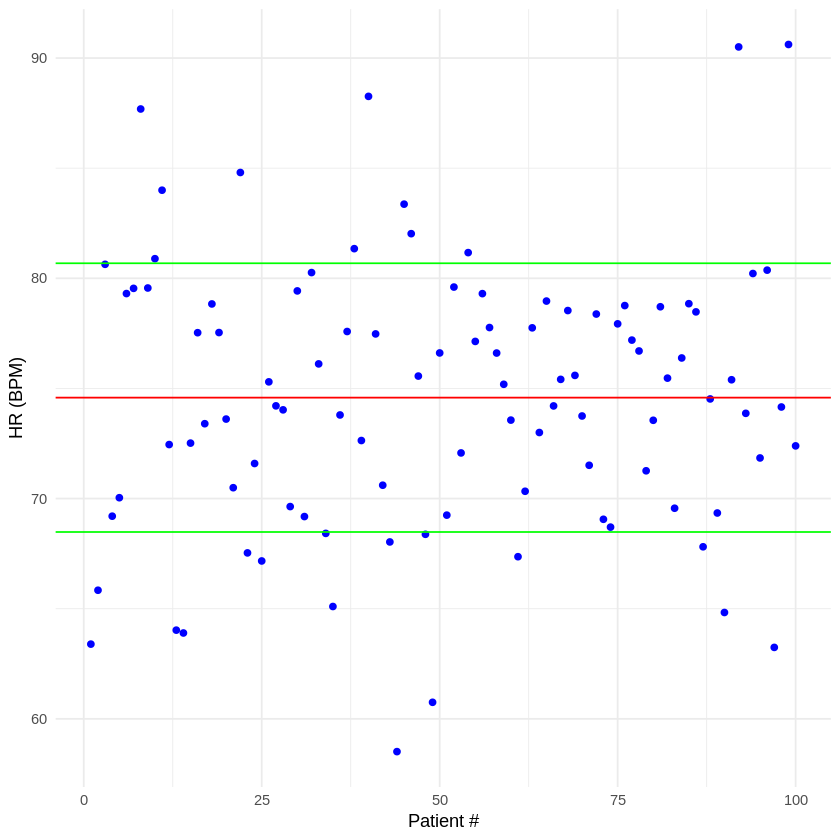

In [9]:
dfPatient = as.data.frame(simulatedData)
colnames(dfPatient) = c('HR')
#head(dfPatient)
# Component plot of the simulated values (which can be seen as a vector)
p = ggplot(data = dfPatient) +
  geom_point(aes(x = 1:nrow(dfPatient), y = HR), color = 'blue') +
  labs( x = 'Patient #', y = 'HR (BPM)') +
  geom_hline(yintercept = mean(simulatedData), color = 'red') +
  geom_hline(yintercept = mean(simulatedData) + sqrt(mean((simulatedData - mean(simulatedData))^2)), color = 'green') +
  geom_hline(yintercept = mean(simulatedData) - sqrt(mean((simulatedData - mean(simulatedData))^2)), color = 'green') +
  theme_minimal()
p

---


$\color{green}{Binomial\ Experiment}$

**Scenario**: a box has 10 balls of which 4 are white and 6 are black balls. We randomly draw 5 balls $\color{green}{with\ replacement}.$ We are interested in the probability that 3 of the 5 drawn balls are white. This is the $\color{green}{binomial\ experiment}$.

Let $X$ be the random variable that represents the number of white balls drawn. Note the two parameters of the experiment:

1. the number of trails or the sample size $n=5$
2. the success proportion in the sample $p=\text{no. of white balls}/\text{total no. of balls} = 4/10.$

We denote the random variable as $$X\sim\text{Bin}(n=5, p = 4/10),$$

and we are interested in $P(X = 3).$

**Probability mass function (PMF)**: $$\begin{align*}P_X(j)&= P(X = j) =nC_j\times p^j\times(1-p)^{n-j}\\\Rightarrow P_X(3) =& P(X = 3) = 5C_3\times (4/10)^3\times(1-4/10)^{5-3}.\end{align*}$$

What is the probability that we will get at most 3 white balls?

**Cumulative distribution function (CDF)**: $$\begin{align*}F_X(j) &= P(X\leq j)\\\Rightarrow F_X(3) &= P(X\leq 3) = P(X=0) + P(X=1)+ P(X=2) + P(X=3).\end{align*}$$

What is the probability that we will get at least 3 white balls?

$$P(X >= 3) = 1 - P(X < 3) = 1 - P(X\leq2).$$

---

In [10]:
n = 5
p = 4/10
j = 3
dbinom(j, n, p) # P(X = j) where X~Bin(n, p)
dbinom(0, n, p) + dbinom(1, n, p) + dbinom(2, n, p)  + + dbinom(2, n, p) # P(X <= 3)
sum(dbinom(0:j, n, p)) # same as above P(X <= 3)
pbinom(j, n, p) # P(X <= j)
1 - pbinom(2, n, p)  # P(X >= 3) = 1 - P(X < 3) = 1 - P(X <= 2)

[1] 0.2304

[1] 1.02816

[1] 0.91296

[1] 0.91296

[1] 0.31744

In [24]:
n = 5
p = 4/10
j = 3
dbinom(j, n, p)
dbinom(3:5, n, p)
sum(dbinom(3:5, n, p))

[1] 0.2304

[1] 0.23040 0.07680 0.01024

[1] 0.31744

In [11]:
nsimulations = 1e5
simulatedData = rbinom(nsimulations, n, p) # simulating a binomial random variable
mean(simulatedData == 2) # simulated probability that X = 2
dbinom(2, n, p) # theoretical probability that X = 2
print('-----');
mean(simulatedData <= 2) # simulated probability that X <= 2
pbinom(2, n, p) # theoretical probability that X <= 2
print('-----');
mean(simulatedData >= 2) # simulated probability that X >= 2
1 - pbinom(1, n, p) # theoretical probability that X >= 2

[1] 0.34549

[1] 0.3456

[1] "-----"


[1] 0.68406

[1] 0.68256

[1] "-----"


[1] 0.66143

[1] 0.66304

---

Simulating a binomial random variable

---

In [12]:
# Simulating a binomial random variable
n = 4
p = 0.4
nsimulations = 1e5
simulatedData = rbinom(nsimulations, n, p)

# Convert simulatedData into a dataframe
dfBinom = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfBinom) = c('Values', 'Frequency')

# Add a new column with proportion (probability) values
dfBinom['Probability'] = dfBinom['Frequency'] / nsimulations

# Add a new column with the cumulative probabilities
dfBinom['Cumprob'] = cumsum(dfBinom['Probability'])

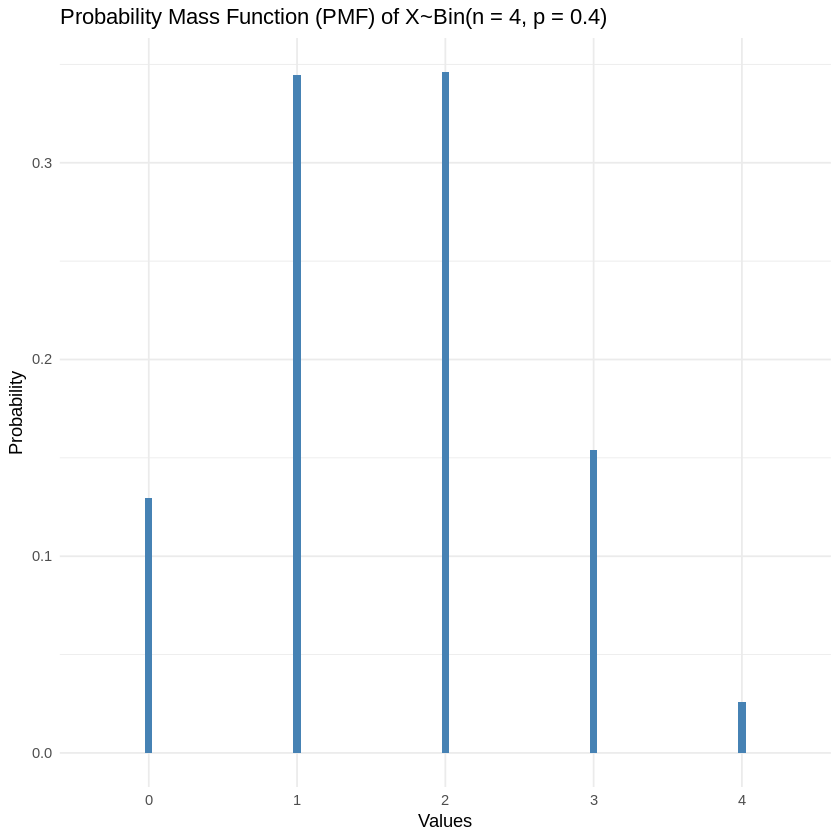

In [13]:
# Plot the PMF of the binomal random variable
p = ggplot(data = dfBinom)+
geom_col(aes(x = Values, y = Probability), width = 0.05, fill = 'steelblue')+
ggtitle('Probability Mass Function (PMF) of X~Bin(n = 4, p = 0.4)')+
theme_minimal()
p

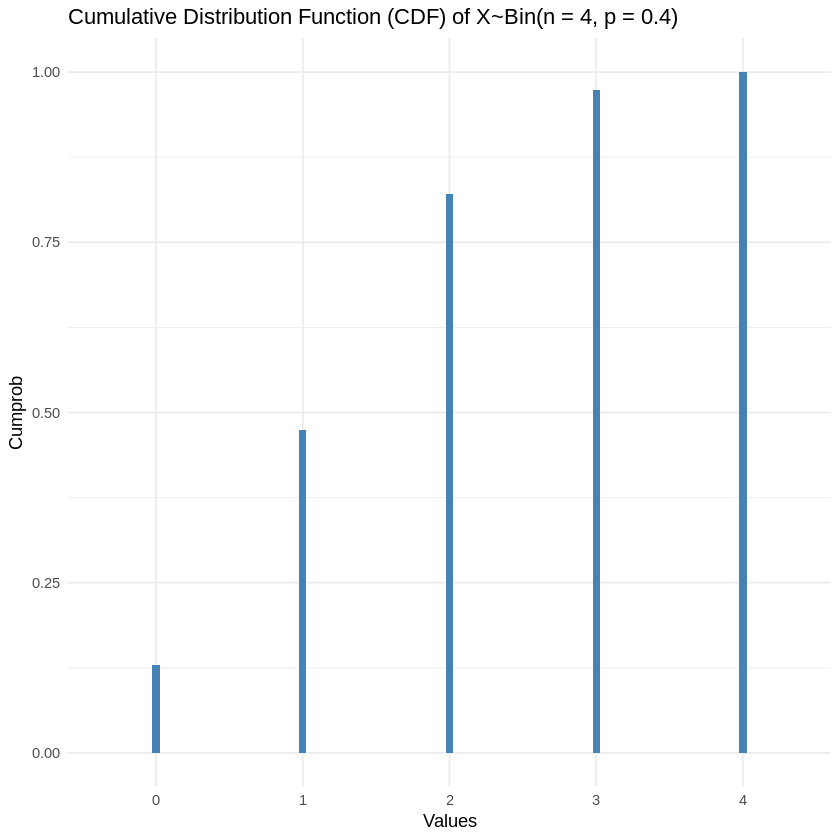

In [14]:
# Plot the CDF
p = ggplot(data = dfBinom)+
geom_col(aes(x = Values, y = Cumprob), width = 0.05, fill = 'steelblue')+
ggtitle('Cumulative Distribution Function (CDF) of X~Bin(n = 4, p = 0.4)')+
theme_minimal()
p

In [15]:
# A demo of the grepl() function
data = c('w1', 'w2', 'b1', 'b2')
sum(grepl('w.*', data))

[1] 2

In [16]:
## Sampling space
s = c('w1', 'w2', 'w3', 'w4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6')

## Probability for sampling an element from the sampling space
p = (1/length(s))* replicate(length(s), 1)

## Simulate the random experiment of drawing 4 balls from 10 balls with
## replacement
nsimulations = 1e5
samplesize = 4
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = TRUE, prob = p))

## Check event if 2 of the 4 drawn balls are white
checkEvent = function(data){
  if (sum(grepl('w.*',  data)) == 2){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 2 of the 4 drawn balls are white
mean(apply(simulatedData, 2, checkEvent))
dbinom(2, 4, 4/(4+6)) # P(X = 2) when X~Bin(n = 4, p = 0.4)

[1] 0.34562

[1] 0.3456

---

**Scenario**: the $\color{green}{binomial\ experiment}$ explained above can be abstracted as a box containing a white and black ball such that we sample $\color{green}{with\ replacement}$ one ball from the box and repeat it 4 times. Here, the probability of drawing a white ball is 4/10 and probability of drawing a black ball is 6/10.

---


In [18]:
## Sampling space
s = c('w', 'b')

## Probability for sampling an element from the sampling space
p = c(0.4, 0.6)

## Simulate the random experiment of drawing 4 balls from 10 balls with
## replacement
nsimulations = 1e5
samplesize = 5
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = TRUE, prob = p))

# Check event if 3 of the 5 drawn balls are white
checkEvent = function(data){
  if (sum(data == 'w') == 3){
    return(1)
  }
  else{
    return(0)
  }
}

# Calculate probability that 3 of the 5 drawn balls are white
res = mean(apply(simulatedData,2,checkEvent))
res

[1] 0.22807

---

**Example**: approximately 42% of people have type O blood. On a given day in a blood bank, 120 people arrive to donate blood. What is the probability that 30 of those 120 people have type O blood?

$$X\sim\text{Bin}(n = 120, p = 0.42),$$

$$X\sim\text{HypGeom}(nsuccess = 42000, nfailure = 58000, n = 120),$$

We want $P(X=30).$

---

In [26]:
n = 120
p = 0.42
j = 30
dbinom(j, n, p)

[1] 4.323108e-05

In [22]:
typeO = (choose(120, 30))*((0.42)^30)*((0.58)^90)
typeO

[1] 4.323108e-05

---

**Example**: It is known that diskettes produced by a certain company will be defective with probability .01, independently of each other. The company sells the diskettes in packages of size 10 and offers a money-back guarantee that at most 1 of the 10 diskettes in the package will be defective. The guarantee is that the customer can return the entire package of diskettes if he or she finds more than one defective diskette in it. If someone buys 3 packages, what is the probability that he or she will return exactly 1 of them?

Let $X$ be the number of packages that are returned.

$$X \sim\text{Bin}(n = 3, p_X =\ ?),$$

and we want $P(X = 1).$

The number of defective items in a package:

$$Z \sim\text{Bin}(n = 10, p_Z = 0.01).$$

$$p_X = P(Z > 1) = 1-P(Z <= 1).$$

---

In [32]:
n = 10
p_z = 0.01

p_x = 1 - pbinom(1,n,p_z)

n_b = 3
j = 3
dbinom(0:j,n,p_x)

[1] 9.581478e-01 4.105164e-02 7.914819e-04 9.042899e-06

---

**Example**: A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light 5 times.

$$X\sim\text{Bin}(n = 8, p = 0.31).$$

We want $P(X=5).$

---

In [31]:
n = 8
p = 0.31
j = 5
dbinom(j, n, p)
#dbinom(3:5, n, p)
#sum(dbinom(3:5, n, p))
#dbinom(j, n, p)
dbinom(0:n, n, p)

[1] 0.05266763

[1] 0.0513798374 0.1846695607 0.2903861932 0.2609267243 0.1465349358
[6] 0.0526676291 0.0118311341 0.0015186963 0.0000852891

---

**Example**: A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light at least 5 times.

$$X\sim\text{Bin}(n = 8, p = 0.31).$$

We want $P(X\geq5).$

---

In [27]:
1 - pbinom(j-1,n,p)

[1] 0.999966

---

**Example**: a machine produces items in batches. For each batch, the machine can be in control or out of control. Suppose the machine is in control for 99\% of the production batches; The production defect rate is 0.01 when the machine is in control and 0.1 when the machine is out of control. Assume that the production size is 1000 items per batch.

Suppose we want to update our *prior* knowledge of the probability that the machine is in/out-of control. To that end, we select a small random sample of 5 items from a production batch and inspect how many among them are defective, which is represented by $X$. Compute the missing entries in the following table using the hint given below:

---

![table](https://dsm04pap002files.storage.live.com/y4mXfEFb-HaPGZNdqxBRlJdFnJejZZ28kRYoGI5acBdY0WuKLxVS6y_whP6zmLpGxMG7_mQYC2OIPa2wkouJ0ofqAiw_6Nh-6wT45EJpEPeEsmzJ2wCj310cGg-zvZS4NEAY6OaeQrEKXTNThqxHIZVfx8m5E5nNY-NxfX1KBqOkbkNrNGMIZQENpUieuQRTwq1?width=660&height=178&cropmode=none)

---

*Hint*:

![hint](https://dsm04pap002files.storage.live.com/y4mYL8V8jmlmzvzkuSs6KxX06nfgHDMNCkbgSMsV2E2edsy31NRHdfdsvm8bG7Y7EMh7PuKO-zxHYUMpYT2veBXxAytwCKgOZeJG413vD8p7LXnVIzdOsForszztScSBh8LCLhxYrrf-w-g6BmDi8EqXz18T-PuNMCuK9qzVhJO2L77oBH5hEXkHC2hNaLBkozG?width=660&height=167&cropmode=none)

---

---

$\color{green}{Hypergeometric\ Experiment}$


**Scenario**: a box has 4 white and 6 black balls. We randomly draw 5 balls $\color{green}{without\ replacement}.$ We are interested in the probability that 3 of the 5 drawn balls are white. This is the $\color{green}{hypergeometric\ experiment}$.

Let $X$ be the random variable that represents the number of white balls drawn. Note the two parameters of the experiment:

1. the number of successes $n_s=\text{no. of white balls}=4.$
2. the number of failures $n_f = \text{no. of black balls}=6.$
3. the sample size $n=5$

We denote the random variable as $$X\sim\text{HypGeom}(n_s = 4, n_f = 6, n = 5),$$

and we are interested in $P(X = 3).$

**Probability mass function (PMF)**: $$\begin{align*}P_X(j)&= P(X = j) =\dfrac{\binom{n_s}{j}\binom{n_f}{n-j}}{\binom{n_s+n_f}{n}}\\\Rightarrow P_X(3) =& P(X = 3) = \dfrac{\binom{4}{3}\binom{6}{5-3}}{\binom{4+6}{5}}.\end{align*}$$

---

---

Simulating a hypergeometric random variable

---

In [ ]:
## Sampling space
s = c('w1', 'w2', 'w3', 'w4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6')

## Probability for sampling an element from the sampling space
p = (1/length(s))* replicate(length(s), 1)

## Simulate the random experiment of drawing 4 balls from 10 balls with
## replacement
nsimulations = 1e5
samplesize = 5
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = FALSE, prob = p))

## Check event if 2 of the 4 drawn balls are white
checkEvent = function(data){
  if (sum(grepl('w.*',  data)) == 3){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 2 of the 4 drawn balls are white
mean(apply(simulatedData, 2, checkEvent))

---

How are the binomial and hypergeometric experiments related?

If $X\sim\text{HypGeom}(n_s, n_f, n)$ such that:
1. sample size is much smaller than population size, $n << (n_s+n_f)$, and
2. number of successes $n_s$ is not close to  $0$ and population size $n_s+n_f,$ then

$X\sim\text{Bin}(n, p)$ approximately where $p=n_s/(n_s+n_f).$

---

In [ ]:
# (1) Sample size is small compared to population size (condition 1 satisfied)
# (2) Success proportion is not too close to 0 or 1 (condition 2 not satisfied)
dbinom(3, 4, 0.99)
dhyper(3, 9900, 100, 4)

# (1) Sample size is small compared to population size (condition 1 not satisfied)
# (2) Success proportion is not too close to 0 or 1 (condition 2 satisfied)
dbinom(4, 9000, 0.4)
dhyper(4, 4000, 6000, 9000)

---

**Example:** an oil company has a $20\%$ chance of striking oil when drilling a well. What is the probability the company will strike oil 3 times in 7 drilling attempts?

$$X\sim\text{Bin}(n = 7, p = 0.2)$$

and we are interested in $P(X = 3).$

---

---

**Example:** an oil company has the following record in the past: out of 10000 drilling attempts, it has struck oil 2000 times. What is the probability the company will strike oil 3 times in 7 drilling attempts?

$$X\sim\text{HypGeom}(nusccess = 2000, nfailure = 8000, n = 7)$$

and the probability we are interested in is $P(X=3).$

---

---

**Example:** an assembly line produces products that they put into boxes of 50. The inspector then randomly picks 3 items inside a box to test to see if they are defective. In a box containing 4 defectives, they are interested in the probability that at least one of the three items sampled is defective.

We need $$ P(X \geq 1),$$ where $$X\sim\text{Hyper}(n_{success} = 4, n_{failure} = 46, n = 3).$$

$$P(X >= 1) = 1 - \underbrace{P(X <=0)}_{={\color{yellow}{F_X}}(0)}$$

---

---

**Example:** an assembly line produces products that they put into boxes of 50. The inspector then randomly picks 3 items inside a box to test to see if they are defective. In a box containing 48 defectives, they are interested in the probability that at least one of the three items sampled is defective.

We need $$ P(X \geq 1),$$ where $$X\sim\text{Hyper}(n_{success} = 48, n_{failure} = 2, n = 3).$$

$$P(X >= 1) = 1 - \underbrace{P(X <=0)}_{={\color{yellow}{F_X}}(0)}$$

---

---

**Example:** an assembly line produces products that they put into boxes of 50. The inspector then randomly picks 45 items inside a box to test to see if they are defective. In a box containing 48 defectives, they are interested in the probability that at least one of the three items sampled is defective.

We need $$ P(X \geq 1),$$ where $$X\sim\text{Hyper}(n_{success} = 48, n_{failure} = 2, n = 45).$$

$$P(X >= 1) = 1 - \underbrace{P(X <=0)}_{={\color{yellow}{F_X}}(0)}$$

---